In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df1 = pd.read_csv('/Users/romanregmi/desktop/statistical_analysis/student-mat.csv',sep=';')
df2 = pd.read_csv('/Users/romanregmi/desktop/statistical_analysis/student-por.csv',sep=';')

# students who only study portuguese
df = pd.merge(df2,df1,on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet","guardian"],how='left',suffixes=['_portuguese','_math'],indicator=True)

In [4]:
df1.shape,df2.shape

((395, 33), (649, 33))

In [5]:
df = df[df['_merge']=='left_only']

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime_portuguese,studytime_portuguese,failures_portuguese,schoolsup_portuguese,famsup_portuguese,paid_portuguese,activities_portuguese,nursery,higher_portuguese,internet,romantic_portuguese,famrel_portuguese,freetime_portuguese,goout_portuguese,Dalc_portuguese,Walc_portuguese,health_portuguese,absences_portuguese,G1_portuguese,G2_portuguese,G3_portuguese,traveltime_math,studytime_math,failures_math,schoolsup_math,famsup_math,paid_math,activities_math,higher_math,romantic_math,famrel_math,freetime_math,goout_math,Dalc_math,Walc_math,health_math,absences_math,G1_math,G2_math,G3_math,_merge
130,GP,M,16,U,GT3,T,2,3,other,other,course,mother,2,3,0,no,yes,no,no,no,yes,yes,yes,3,2,3,2,2,1,4,13,12,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
132,GP,F,18,U,GT3,T,2,1,services,other,reputation,mother,1,2,3,no,yes,no,yes,yes,no,yes,yes,5,4,5,1,3,5,10,10,9,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
133,GP,F,17,U,LE3,A,2,1,other,other,course,mother,3,1,0,no,yes,no,no,yes,yes,yes,no,3,2,2,1,2,5,8,11,10,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
137,GP,M,16,U,GT3,T,2,1,at_home,other,course,mother,4,1,0,no,no,no,no,yes,yes,no,no,3,2,1,1,1,2,4,9,9,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
138,GP,F,16,U,GT3,A,2,2,other,other,home,mother,1,1,1,no,no,no,no,yes,yes,no,no,5,3,4,1,1,5,12,13,11,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [7]:
df.shape

(275, 53)

In [8]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime_portuguese',
       'studytime_portuguese', 'failures_portuguese', 'schoolsup_portuguese',
       'famsup_portuguese', 'paid_portuguese', 'activities_portuguese',
       'nursery', 'higher_portuguese', 'internet', 'romantic_portuguese',
       'famrel_portuguese', 'freetime_portuguese', 'goout_portuguese',
       'Dalc_portuguese', 'Walc_portuguese', 'health_portuguese',
       'absences_portuguese', 'G1_portuguese', 'G2_portuguese',
       'G3_portuguese', 'traveltime_math', 'studytime_math', 'failures_math',
       'schoolsup_math', 'famsup_math', 'paid_math', 'activities_math',
       'higher_math', 'romantic_math', 'famrel_math', 'freetime_math',
       'goout_math', 'Dalc_math', 'Walc_math', 'health_math', 'absences_math',
       'G1_math', 'G2_math', 'G3_math', '_merge'],
      dtype='object')

In [9]:
df.drop(columns=['traveltime_math',
       'studytime_math', 'failures_math', 'schoolsup_math', 'famsup_math',
       'paid_math', 'activities_math', 'higher_math', 'romantic_math',
       'famrel_math', 'freetime_math', 'goout_math', 'Dalc_math', 'Walc_math',
       'health_math', 'absences_math', 'G1_math', 'G2_math', 'G3_math',
       '_merge'],inplace=True)

In [10]:
df.isnull().sum()

school                   0
sex                      0
age                      0
address                  0
famsize                  0
Pstatus                  0
Medu                     0
Fedu                     0
Mjob                     0
Fjob                     0
reason                   0
guardian                 0
traveltime_portuguese    0
studytime_portuguese     0
failures_portuguese      0
schoolsup_portuguese     0
famsup_portuguese        0
paid_portuguese          0
activities_portuguese    0
nursery                  0
higher_portuguese        0
internet                 0
romantic_portuguese      0
famrel_portuguese        0
freetime_portuguese      0
goout_portuguese         0
Dalc_portuguese          0
Walc_portuguese          0
health_portuguese        0
absences_portuguese      0
G1_portuguese            0
G2_portuguese            0
G3_portuguese            0
dtype: int64

In [11]:
df.shape

(275, 33)

In [12]:
df['sex'].value_counts()


F    185
M     90
Name: sex, dtype: int64

In [13]:
df['sex'].value_counts()

F    185
M     90
Name: sex, dtype: int64

In [14]:
GP = df[df['school']=='GP']
MS = df[df['school']=='MS']

Text(0.5, 1.0, 'GP')

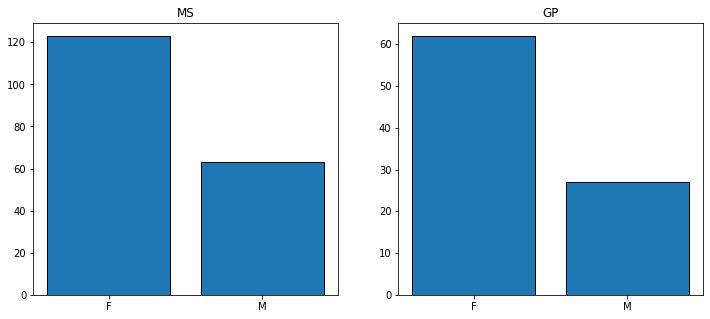

In [15]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,5))

ax1.bar(MS['sex'].value_counts().index,MS['sex'].value_counts(), edgecolor='black')
ax2.bar(GP['sex'].value_counts().index,GP['sex'].value_counts(), edgecolor='black')

ax1.set_title('MS')
ax2.set_title('GP')



In [16]:
print(df.groupby(['school','sex']).G3_portuguese.mean())
print(df.groupby(['school','sex']).G3_portuguese.std())

school  sex
GP      F      12.290323
        M      11.296296
MS      F      10.894309
        M       9.984127
Name: G3_portuguese, dtype: float64
school  sex
GP      F      2.613879
        M      2.599036
MS      F      3.754370
        M      3.338399
Name: G3_portuguese, dtype: float64


In [17]:
# there isn't must difference between the mean or std of the two schools
# we will study the relationship as a whole

In [18]:
corr = df.iloc[:,30:33]
corr.head()

,G1_portuguese,G2_portuguese,G3_portuguese
130,13,12,13
132,10,9,8
133,11,10,11
137,9,9,11
138,13,11,11


In [19]:
corr.corr()

,G1_portuguese,G2_portuguese,G3_portuguese
G1_portuguese,1.000000,0.827655,0.815144
G2_portuguese,0.827655,1.000000,0.938487
G3_portuguese,0.815144,0.938487,1.000000


In [20]:
print("there is high correlation between mid-term marks and final marks")

there is high correlation between mid-term marks and final marks


In [21]:
internet_students = df[df['internet']=='yes']
offline_students = df[df['internet']=='no']
random_internet = internet_students.sample(32)
random_offline = offline_students.sample(41)

In [22]:
print(random_internet['G3_portuguese'].mean())
print(random_internet['G3_portuguese'].std())

11.65625
4.084663487541123


In [23]:
print(random_offline['G3_portuguese'].mean())
print(random_offline['G3_portuguese'].std())

10.902439024390244
3.0561812613847077


In [24]:
#find variance for each group
print(np.var(random_internet['G3_portuguese']), np.var(random_offline['G3_portuguese']))

16.1630859375 9.112433075550268


In [25]:
np.var(random_offline['G3_portuguese'])/np.var(random_internet['G3_portuguese'])

0.5637805250053456

In [26]:
#np.var(random_offline['G3_portuguese'])/np.var(random_internet['G3_portuguese']) < 4
#therefore perform two sample t-test with equal variances
st.ttest_ind(a=random_internet['G3_portuguese'], b=random_offline['G3_portuguese'], equal_var=True)

Ttest_indResult(statistic=0.9021942720497318, pvalue=0.37000420578776694)

In [27]:
print("because the p-value of our test (0.0020) is less than alpha = 0.05, we reject the null hypothesis of the test.")

print('\n')

print("null hypothesis : mean_with_internet = mean_without_internet")

because the p-value of our test (0.0020) is less than alpha = 0.05, we reject the null hypothesis of the test.


null hypothesis : mean_with_internet = mean_without_internet


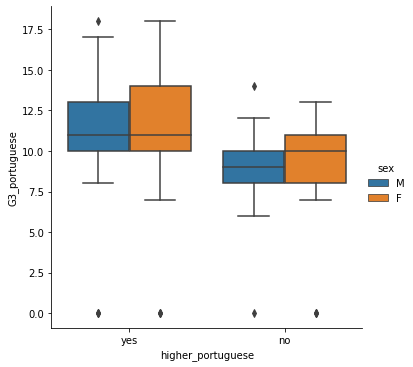

In [28]:
# it is fair to assume that those who want higher studies will try and do better in order to get into college
sns.catplot(x='higher_portuguese',y='G3_portuguese',kind='box',data=df, hue='sex')

In [29]:
print(df.groupby(['romantic_portuguese','sex']).G3_portuguese.mean())

romantic_portuguese  sex
no                   F      11.612245
                     M      10.796610
yes                  F      11.080460
                     M       9.580645
Name: G3_portuguese, dtype: float64


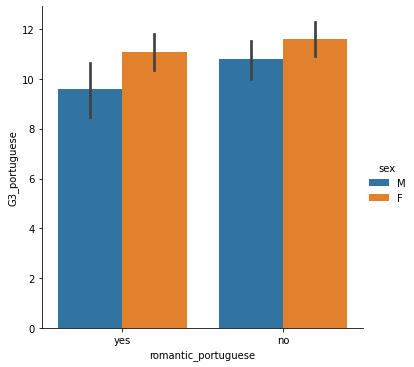

In [30]:
sns.catplot(x='romantic_portuguese',y='G3_portuguese',hue='sex',kind='bar',data=df)
#Line represents error

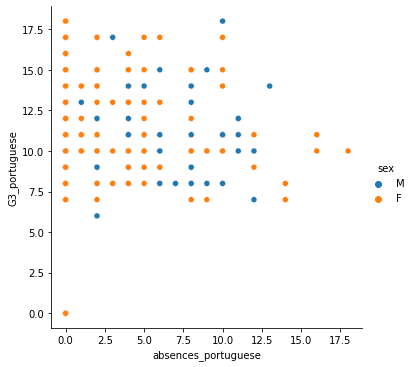

In [31]:
abscent = df[df['absences_portuguese']<=20]
sns.relplot(x='absences_portuguese',y='G3_portuguese',data=abscent, hue='sex')

In [32]:
print("there does not seem to be any relationsip between being abscent and scoring low marks")

there does not seem to be any relationsip between being abscent and scoring low marks


In [33]:
# students studying both the subjects

df3 = pd.merge(df1,df2,on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet","guardian"],suffixes=['_math','_portuguese'])


In [34]:
df3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime_math,studytime_math,failures_math,schoolsup_math,famsup_math,paid_math,activities_math,nursery,higher_math,internet,romantic_math,famrel_math,freetime_math,goout_math,Dalc_math,Walc_math,health_math,absences_math,G1_math,G2_math,G3_math,traveltime_portuguese,studytime_portuguese,failures_portuguese,schoolsup_portuguese,famsup_portuguese,paid_portuguese,activities_portuguese,higher_portuguese,romantic_portuguese,famrel_portuguese,freetime_portuguese,goout_portuguese,Dalc_portuguese,Walc_portuguese,health_portuguese,absences_portuguese,G1_portuguese,G2_portuguese,G3_portuguese
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13


In [35]:
df3.shape

(376, 52)

In [36]:
df3.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime_math',
       'studytime_math', 'failures_math', 'schoolsup_math', 'famsup_math',
       'paid_math', 'activities_math', 'nursery', 'higher_math', 'internet',
       'romantic_math', 'famrel_math', 'freetime_math', 'goout_math',
       'Dalc_math', 'Walc_math', 'health_math', 'absences_math', 'G1_math',
       'G2_math', 'G3_math', 'traveltime_portuguese', 'studytime_portuguese',
       'failures_portuguese', 'schoolsup_portuguese', 'famsup_portuguese',
       'paid_portuguese', 'activities_portuguese', 'higher_portuguese',
       'romantic_portuguese', 'famrel_portuguese', 'freetime_portuguese',
       'goout_portuguese', 'Dalc_portuguese', 'Walc_portuguese',
       'health_portuguese', 'absences_portuguese', 'G1_portuguese',
       'G2_portuguese', 'G3_portuguese'],
      dtype='object')

In [37]:
df3.shape

(376, 52)

In [38]:
# if one is good in one subject, is he/she also good in another?

corr = df3[['G3_portuguese','G3_math']]
corr.corr()

,G3_portuguese,G3_math
G3_portuguese,1.000000,0.497228
G3_math,0.497228,1.000000


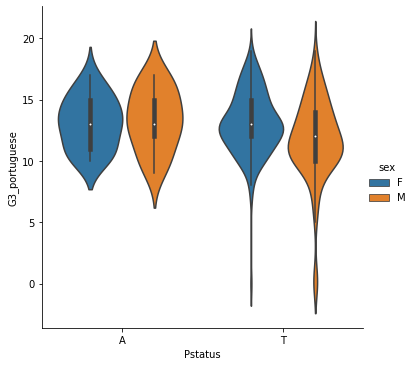

In [39]:
sns.catplot(x='Pstatus',y='G3_portuguese',kind='violin',data=df3, hue='sex')
# violin plots are useful when comparing distributions
# the dark thick line is the IQR : Q3-Q1
#  the white spot is the median


In [40]:
# The IQR is a measurement of the variability about the median. More specifically, the IQR tells us the range of the middle half of the data.
# useful in finding outliers

In [41]:
df3[(df3['G3_math']==0) | (df3['G3_portuguese']==0)].shape

(40, 52)

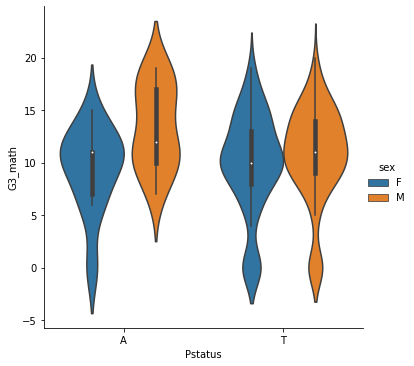

In [42]:
sns.catplot(x='Pstatus',y='G3_math',kind='violin',data=df3, hue='sex')

In [43]:
# students who got 0 can be considered outliers 

In [44]:
df3 = df3[(df3['G3_math']!=0) & (df3['G3_portuguese']!=0)]

In [45]:
df3.shape

(336, 52)

In [46]:
corr = df3[['G3_portuguese','G3_math','studytime_math','studytime_portuguese']]
corr.corr()

,G3_portuguese,G3_math,studytime_math,studytime_portuguese
G3_portuguese,1.000000,0.583694,0.252533,0.255865
G3_math,0.583694,1.000000,0.098873,0.100926
studytime_math,0.252533,0.098873,1.000000,0.987374
studytime_portuguese,0.255865,0.100926,0.987374,1.000000


In [47]:
# the above relation is rather odd
# it shows there is little to no relationship between study time and grades

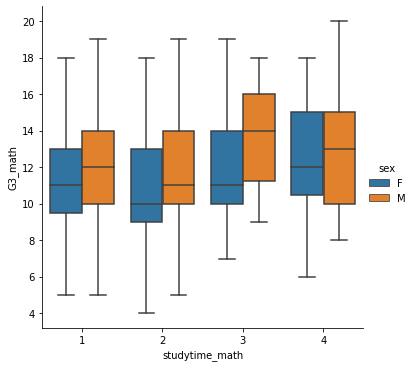

In [48]:
sns.catplot(x='studytime_math',y='G3_math',kind='box',data=df3, hue='sex')

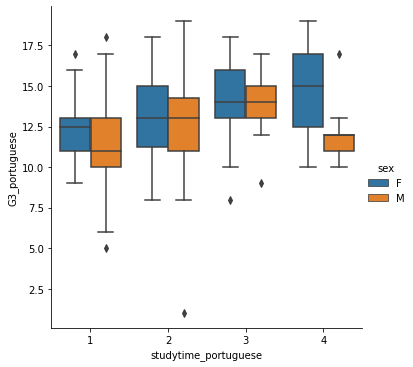

In [49]:
sns.catplot(x='studytime_portuguese',y='G3_portuguese',kind='box',data=df3, hue='sex')

In [50]:
# the range is quite high for those who study less